In [150]:
import pandas as pd
import seaborn as sns

In [151]:
titanic_data = sns.load_dataset('titanic')

In [152]:
survived = titanic_data[titanic_data["survived"] == 1]
died = titanic_data[titanic_data["survived"] == 0]
titanic_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


[Text(0.5, 1.0, 'Mean fare by town where passenger embarked'),
 Text(0, 0.5, 'Mean fare'),
 Text(0.5, 0, 'Town')]

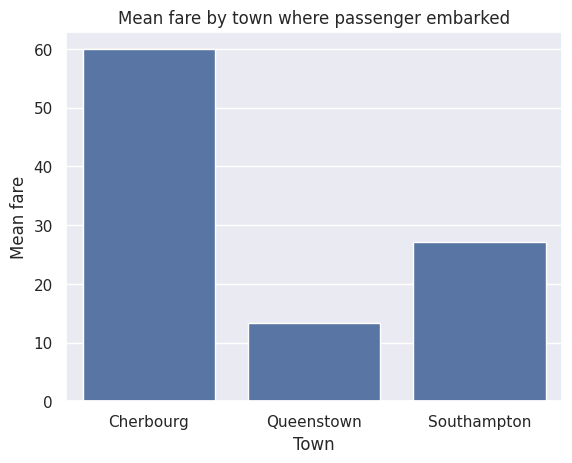

In [153]:
fare_by_town = titanic_data.groupby('embark_town')['fare'].mean().reset_index(name="mean_fare")
sns.barplot(fare_by_town, x="embark_town", y="mean_fare").set(title="Mean fare by town where passenger embarked", ylabel="Mean fare", xlabel="Town")

/tmp/ipykernel_262463/3742241112.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_by_town_and_class = titanic_data.groupby(['embark_town', 'class'])['fare'].mean().reset_index(name="mean_fare")


[Text(0.5, 0, 'Town'),
 Text(0, 0.5, 'Mean fare'),
 Text(0.5, 1.0, 'Mean fare by embark town and passenger class')]

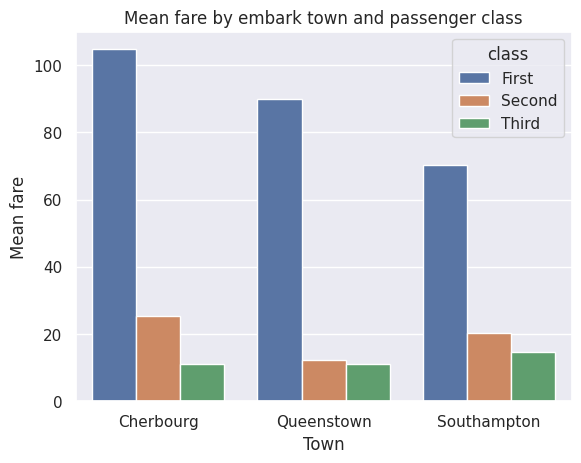

In [154]:
fare_by_town_and_class = titanic_data.groupby(['embark_town', 'class'])['fare'].mean().reset_index(name="mean_fare")
sns.barplot(fare_by_town_and_class, x='embark_town', y='mean_fare', hue='class').set(xlabel="Town", ylabel="Mean fare", title="Mean fare by embark town and passenger class")

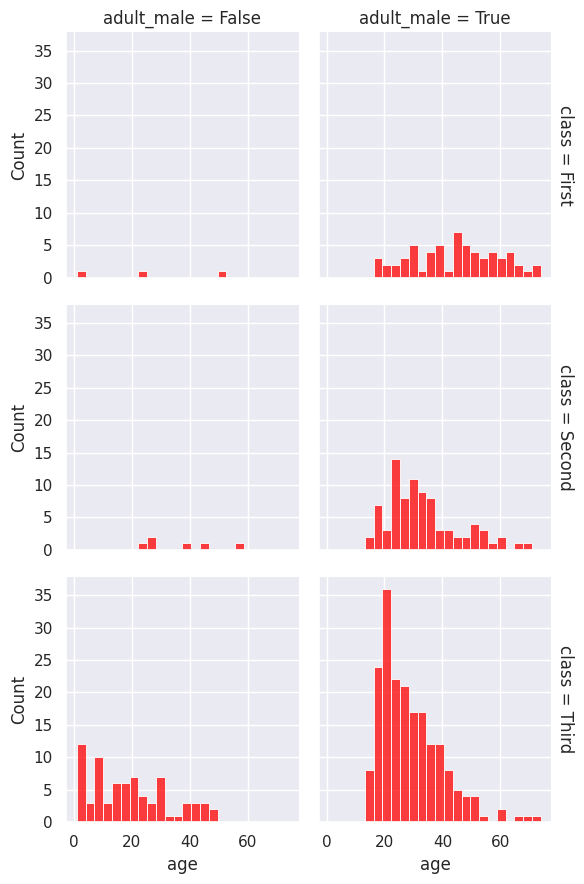

In [155]:
sns.displot(
    died, x="age", col="adult_male", row="class", color="red",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

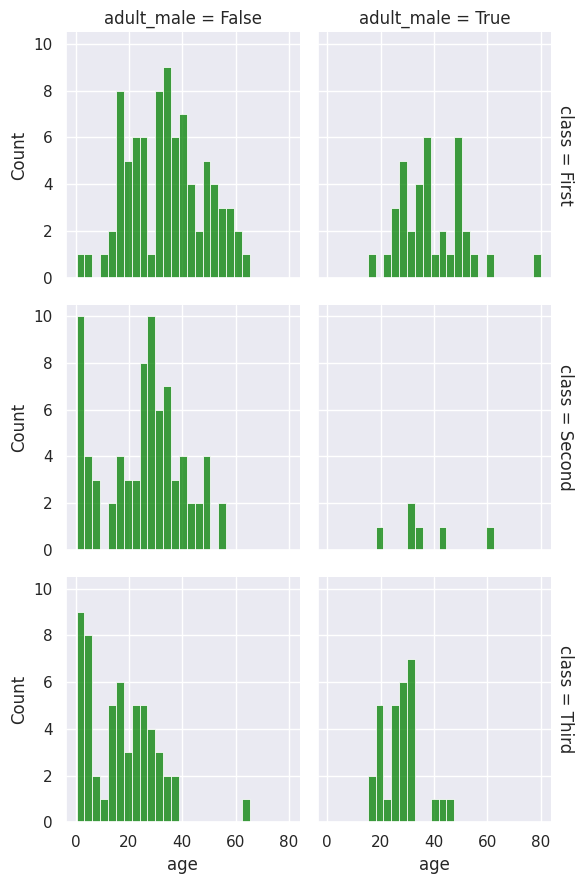

In [157]:
sns.displot(
    survived, x="age", col="adult_male", row="class", color="green",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

In [158]:
avera = titanic_data.groupby(["class", "adult_male", "survived"]).count()["alone"].reset_index(name="Count")
first_nam_dead, first_nam_alive, first_am_dead, first_am_alive, second_nam_dead, second_nam_alive, second_am_dead, second_am_alive, third_nam_dead, third_nam_alive, third_am_dead, third_am_alive = avera["Count"]
breakdown = [first_nam_dead, first_nam_alive, first_am_dead, first_am_alive, second_nam_dead, second_nam_alive, second_am_dead, second_am_alive, third_nam_dead, third_nam_alive, third_am_dead, third_am_alive]
breakdown

/tmp/ipykernel_262463/3922209812.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avera = titanic_data.groupby(["class", "adult_male", "survived"]).count()["alone"].reset_index(name="Count")


[3, 94, 77, 42, 6, 79, 91, 8, 91, 81, 281, 38]

In [159]:
percentage_am_dead_by_class = [breakdown[i]*100/(breakdown[i]+breakdown[i+1]) for i in range(0, len(breakdown), 2)]
percentage_dict = {"1st class\n(not men)": percentage_am_dead_by_class[0],
                   "1st class\n(men)": percentage_am_dead_by_class[1],
                   "2nd class\n(not men)": percentage_am_dead_by_class[2],
                   "2nd class\n(men)": percentage_am_dead_by_class[3],
                   "3rd class\n(not men)": percentage_am_dead_by_class[4],
                   "3rd class\n(men)": percentage_am_dead_by_class[5],
                  }
percentage_dict

{'1st class\n(not men)': 3.0927835051546393,
 '1st class\n(men)': 64.70588235294117,
 '2nd class\n(not men)': 7.0588235294117645,
 '2nd class\n(men)': 91.91919191919192,
 '3rd class\n(not men)': 52.906976744186046,
 '3rd class\n(men)': 88.08777429467085}

[Text(0.5, 0, 'Demographic'),
 Text(0, 0.5, 'Percentage died (%)'),
 Text(0.5, 1.0, 'Passengers who died as a percentage of their demographic')]

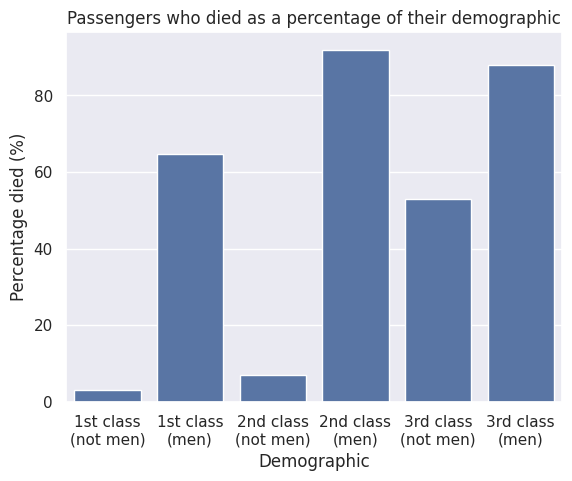

In [160]:
sns.barplot(percentage_dict).set(xlabel='Demographic', ylabel='Percentage died (%)', title="Passengers who died as a percentage of their demographic")